# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Описание данных:

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м);
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

Для выполнения поставленной задачи предстоит выполнить ряд действий по обработке данных и их анализу, а именно:
    1. Предобработка данных
    - Выполним ряд действий для первичного анализа данных и изучим имеющиеся у нас данные
    - Проверим данные на пропуски, постараемся разобраться в причине их появления
    - Сверим типы данных. При необходимости изменим типы данных на необходимые нам
    2. Добавление необходимых данных
    - Добавим столбец с ценой 1м2
    - Добавим столбцы со значениями года, месяца и недели публикации
    - Добавим столбцы со значениями отношения жилой площади к общей и площади кухни к общей
    3. Проведем анализ имеющихся данных
    - Проверим данные на наличие выбросов, отсеим данные находящиеся за пределами межквартильного размаха.
    - Построим графики множества величин и посчитаем корелляwb.
    - Постараемся увидеть зависимость цены за 1м2 от расстояния до центра. Выделим центральную часть города и сравним данные по ней и по всему городу.
    4. Сделаем общий вывод по проделанной работе

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
list_of_apart = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') # list_of_apart (список квартир)
list_of_apart.isnull().sum()       
list_of_apart.info()
list_of_apart.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Вывод

Видим пропуски во всех столбцах кроме total_images, last_price, total_area, first_day_exposition, rooms, floor, studio, open_plan. Для выполнения нашей задачи нам будут нужны не все столбцы, поэтому заполнение пропусков будем производить выборочно. Заполнение произведем чуть позже. Поменяем тип данных с столбцах floors_total, days_exposition, balcony на int. Остальные типы оставим как есть.

### Шаг 2. Предобработка данных

In [3]:
list_of_apart['balcony'] = list_of_apart['balcony'].fillna(list_of_apart['balcony'].median()) 
list_of_apart['ceiling_height'] = list_of_apart['ceiling_height'].fillna(list_of_apart['ceiling_height'].median())
list_of_apart['days_exposition'] = list_of_apart['days_exposition'].fillna(list_of_apart['days_exposition'].median())
list_of_apart['cityCenters_nearest'] = list_of_apart['cityCenters_nearest'].fillna(list_of_apart['cityCenters_nearest'].median())
list_of_apart['floors_total'] = list_of_apart['floors_total'].fillna(list_of_apart['floors_total'].median())
list_of_apart['living_area'] = list_of_apart['living_area'].fillna(list_of_apart['living_area'].median())

list_of_apart['floors_total'] = list_of_apart['floors_total'].astype(int)
list_of_apart['days_exposition'] = list_of_apart['days_exposition'].astype(int)
list_of_apart['balcony'] = list_of_apart['balcony'].astype(int)

list_of_apart['locality_name'] = list_of_apart['locality_name'].str.lower()

list_of_apart.info()
list_of_apart.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     23699 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16,51.00,8,NaN,...,25.00,1,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11,18.60,1,NaN,...,11.00,2,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5,34.30,4,NaN,...,8.30,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14,30.00,9,NaN,...,NaN,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14,32.00,13,NaN,...,41.00,1,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12,14.40,5,NaN,...,9.10,1,городской посёлок янино-1,NaN,13098.5,NaN,NaN,NaN,NaN,55
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26,10.60,6,NaN,...,14.40,1,посёлок парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24,30.00,22,NaN,...,18.90,2,санкт-петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,95
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27,15.43,26,NaN,...,8.81,1,посёлок мурино,NaN,13098.5,NaN,NaN,NaN,NaN,189
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9,43.60,7,NaN,...,6.50,2,санкт-петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289


### Вывод

В нужных нам столбцах заменили пропуски на медианные значения. Применили медиану потому, что разброс данных в некоторых столбцах слишком велик и было бы не корректно вычислять среднее. Медиана более устойчива к выбросам чем среднее.
Привели необходимые столбцы floors_total, days_exposition, balcony к целочисленному типу. Целочисленный тип данных в этих столбцах смотрица более логичным. В столбце locality_name привели все наименования к нижнему регистру, думаю что это действие поможет нам избежать глупых ошибок.

### Шаг 3. Посчитайте и добавьте в таблицу

In [4]:
list_of_apart['price_per_meter'] = list_of_apart['last_price'] / list_of_apart['total_area'] 

list_of_apart['first_day_exposition'] = pd.to_datetime(list_of_apart['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [5]:
def floor_group(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    else:
        return 'другой'
list_of_apart['floor_group'] = list_of_apart.apply(floor_group, axis = 1)

In [6]:
list_of_apart['year'] = list_of_apart['first_day_exposition'].dt.year
list_of_apart['month'] = list_of_apart['first_day_exposition'].dt.month
list_of_apart['weekday'] = list_of_apart['first_day_exposition'].dt.weekday

In [7]:
list_of_apart['living_total_ratio'] = list_of_apart['living_area'] / list_of_apart['total_area']
list_of_apart['kitchen_total_ratio'] = list_of_apart['kitchen_area'] / list_of_apart['total_area']

list_of_apart.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 29 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     23699 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_aroun

### Вывод

Добавили столбец с ценой за 1м2 (price_per_meter). 
Записали в столбец "правильную" дату. Теперь тип данных этого столбца нас устраивает (datetime64[ns]). С ним можно работать. Написали функцию для группировки по этажам (floor_group). 
Добавили столбцы с отдельными значениями год, месяц и день недели.
Добавили столбцы с соотношением жилой площади к общей и площади кухни к общей. 

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

In [8]:
new_list_of_apart = list_of_apart[['total_area', 'price_per_meter', 'rooms', 'ceiling_height', 'days_exposition']]
print (new_list_of_apart.isna().sum())

total_area         0
price_per_meter    0
rooms              0
ceiling_height     0
days_exposition    0
dtype: int64


Cоздали новую таблицу для дальнейших модификаций. Проверили наличие пропусков. Пропусков нет.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efd67b12e48>,
      dtype=object)

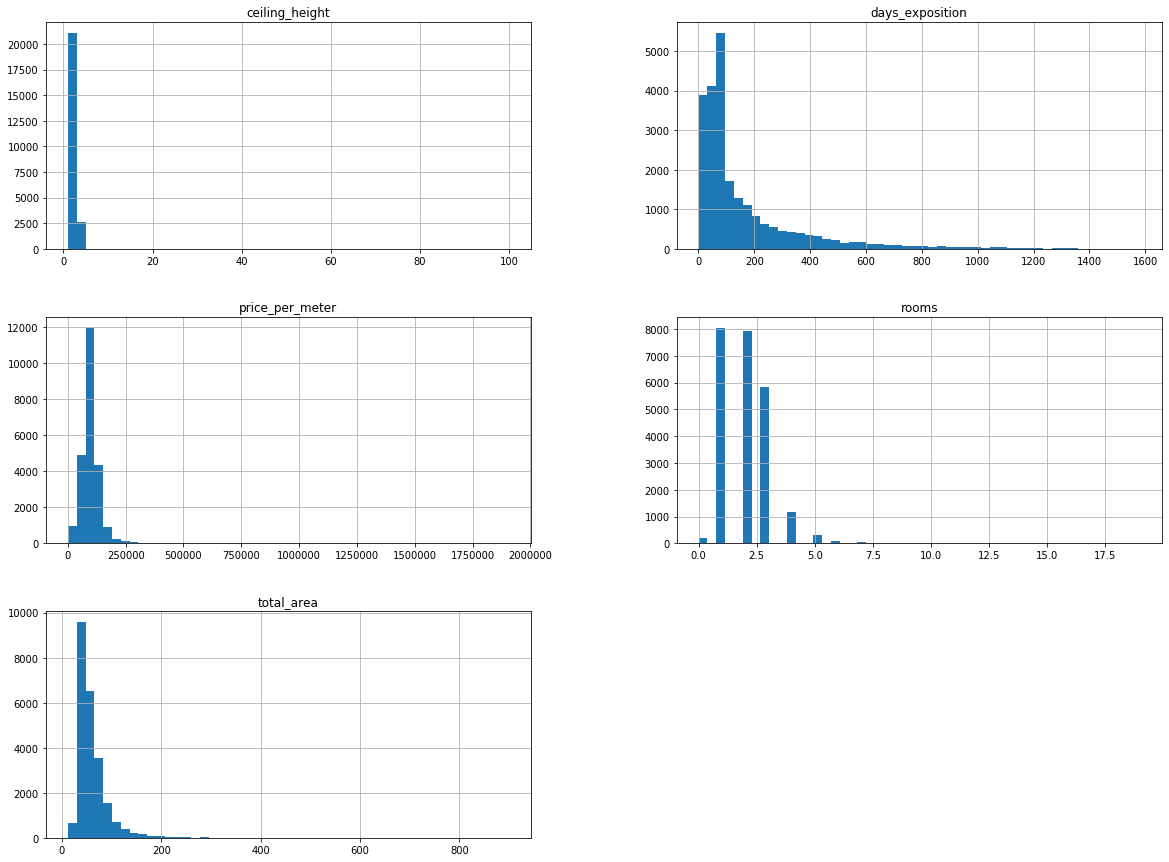

In [9]:
new_list_of_apart.hist(column = ['total_area', 'price_per_meter', 'rooms', 'ceiling_height', 'days_exposition'], bins=50, figsize = (20, 15))

По гистограмме высот потолков видим большой пик значений в интервале от 0 до 20м. Чуть позже более детально ихучим эти значения и проанализируем столбец на наличие выбросов. 

На гистограмме количества дней от публикации до снятия видим что основная масса недвижимости была снята с продажи в отрезке 0-200 дней. Помимо этого видим резкий скачок снятий с продажи примерно на 90 день. После скачка следует резкое уменьшение количества снятий с продажи. Не думаю что этот всплеск является фактом покупки квартиры. Есть вероятность того, что такой скачок обусловлен политикой платформы на которой недвижимость выставляется на продажу. Вполне возможно, что продавцам дается 90 бесплатных дней для размещения объявления, после чего объявление снимается с публикации.

Гистограмма цены за 1м2 похожа на гистограмму нормального распределения, однако видим длинный хвост со слишком большими ценами за 1м2. Позже проанализируем этот столбец используя ящик с усами и посмотрим на межквартильный интервал.

На гистограмме количества комнат видим небольшое количество квартир с количеством комнат "0", что является абсурдом. Позже поглядим на этот столбец по ящику с усами и скорее всего отсеим часть значений, например квартиры с количеством комнат < 1.

У площади наблюдаем длинный хвост уходящий в положительном направлении. Помимо этого видим резкий скачок примерно на значении 20м2. График перекошен в положительном направлении. Думаю что делать выводы слишком рано, необходимо поглядеть информацию методом describe и boxplot. 

Далее мы постараемся проанализировать все графики на наличие выбросов и постараемся очистить данные по столбцам от значений выходящих за пределы межквартильного размаха.




In [10]:
new_list_of_apart.describe()

,total_area,price_per_meter,rooms,ceiling_height,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000
mean,60.348651,9.942166e+04,2.070636,2.724358,169.360226
std,35.654083,5.030680e+04,1.078405,0.988298,206.535633
min,12.000000,1.118349e+02,0.000000,1.000000,1.000000
25%,40.000000,7.658547e+04,1.000000,2.600000,45.000000
50%,52.000000,9.500000e+04,2.000000,2.650000,95.000000
75%,69.900000,1.142563e+05,3.000000,2.700000,199.000000
max,900.000000,1.907500e+06,19.000000,100.000000,1580.000000


Вывели общую информацию по таблице. Видим наличие выбросов таких как площади квартир в 12м2 и 900м2.Количество комнат 0 и 19. Высоту потолков в 1м и 100м. Цена за 1м2 2млн и 111 руб. Нам необходимо избавиться от подобных данных.

(0, 120)

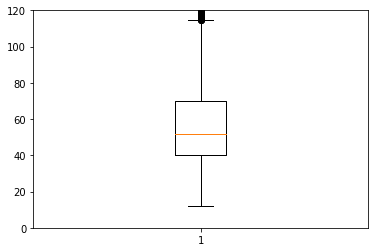

In [11]:
plt.boxplot(new_list_of_apart['total_area'])
plt.ylim(0, 120)

Вывели ящик с усами для определения границ нормальных значений. Для площади возьмем границы 20 и 120.

(0, 200000)

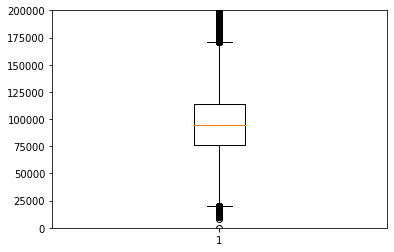

In [12]:
plt.boxplot(new_list_of_apart['price_per_meter'])
plt.ylim(0, 200000)

Для цены за 1м2 приниаем граничные значения 25000 и 175000.

(0, 10)

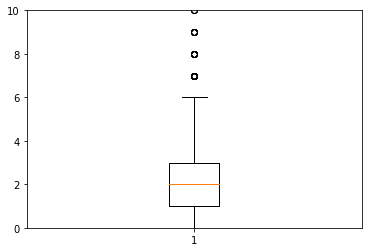

In [13]:
plt.boxplot(new_list_of_apart['rooms'])
plt.ylim(0, 10)

Количество комнат - от 0 до 6 (не включая 0).

(2, 4)

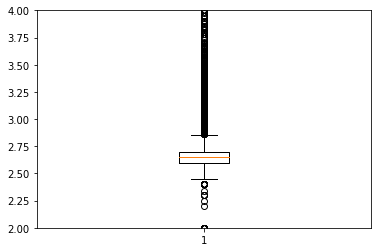

In [14]:
plt.boxplot(new_list_of_apart['ceiling_height'])
plt.ylim(2, 4)

Попробуем построить боксплоты для всей таблицы используя библиотеку seaborn.

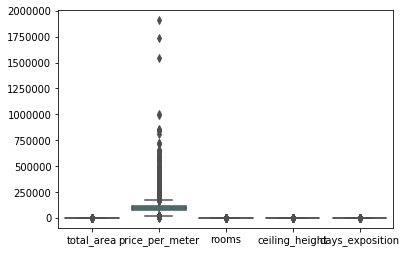

In [15]:
sns.boxplot(data=new_list_of_apart , palette='rainbow')

Высоту потолков ограничим значениями 2.5м и 3м.

Проверим сколько процентов данных мы потеряем, если отфильтруем нашу таблицу по условиям написанным выше.
Количество утраченных данных не превышает 7%. Это не много, поэтому выбранные условия нас устраивают.

In [16]:
print (len(new_list_of_apart.query('20 <= total_area <= 120')) / len(new_list_of_apart))
print (len(new_list_of_apart.query('25000 <= price_per_meter <= 175000')) / len(new_list_of_apart))
print (len(new_list_of_apart.query('0 < rooms <= 6')) / len(new_list_of_apart))
print (len(new_list_of_apart.query('2.5 <= ceiling_height <= 3')) / len(new_list_of_apart)) 

0.9540486940377231
0.9526140343474409
0.9878897843790877
0.932402211063758


С помощью метода query() отфильтруем таблицу по выбранным условиям и создадим на ее основе новую.   

In [17]:
fix_new_list_of_apart = list_of_apart.query('20 <= total_area <= 120 and 25000 <= price_per_meter <= 175000 and 0 < rooms <= 6 and 2.5 <= ceiling_height <= 3')

Проверим с помощью метода describe() все показатели новой таблицы.

In [18]:
fix_new_list_of_apart.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,year,month,weekday,living_total_ratio,kitchen_total_ratio
count,20530.000000,2.053000e+04,20530.000000,20530.000000,20530.000000,20530.000000,20530.000000,20530.000000,18730.000000,20530.000000,...,6265.000000,15504.000000,7327.000000,20530.000000,20530.000000,20530.000000,20530.000000,20530.000000,20530.000000,18730.000000
mean,9.751096,5.022168e+06,53.764717,1.944228,2.647655,11.087189,30.542116,6.060058,9.736821,1.082562,...,498.195531,0.688209,535.510850,163.292986,93002.622506,2017.377545,6.397808,2.574233,0.565612,0.190102
std,5.571285,2.568901e+06,19.024935,0.883190,0.111447,6.647173,12.685722,4.980047,4.121247,0.773138,...,338.162704,0.875712,276.214087,199.253792,28082.662921,1.025009,3.491080,1.796823,0.115793,0.070620
min,0.000000,7.500000e+05,20.000000,1.000000,2.500000,1.000000,2.000000,1.000000,1.300000,0.000000,...,1.000000,0.000000,13.000000,1.000000,25000.000000,2014.000000,1.000000,0.000000,0.038462,0.043524
25%,6.000000,3.386250e+06,39.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,1.000000,...,299.000000,0.000000,320.000000,45.000000,75454.870459,2017.000000,3.000000,1.000000,0.489426,0.136364
50%,9.000000,4.450000e+06,49.900000,2.000000,2.650000,9.000000,30.000000,5.000000,9.000000,1.000000,...,462.000000,0.000000,522.000000,95.000000,93163.655492,2017.000000,6.000000,3.000000,0.565029,0.176471
75%,14.000000,5.999000e+06,64.000000,3.000000,2.650000,16.000000,38.400000,8.000000,11.000000,1.000000,...,620.000000,1.000000,746.000000,191.000000,110031.298076,2018.000000,10.000000,4.000000,0.637681,0.235294
max,50.000000,2.027504e+07,120.000000,6.000000,3.000000,60.000000,100.000000,33.000000,64.000000,5.000000,...,3190.000000,3.000000,1344.000000,1580.000000,175000.000000,2019.000000,12.000000,6.000000,1.500000,0.787879


Создали новую таблицу на основе старой и удалили строки не подходящие по условиям.
После проведенной очистки данных от выбросов проверили данные по общим параметрам.Теперь в данных нет выбросов. Продолжим.

Создадим новюу таблицу correct_data из необходимых для работы столбцов.

In [19]:
correct_list_of_apart = fix_new_list_of_apart[['last_price', 'total_area', 'rooms', 'floor_group', 'cityCenters_nearest', 'balcony']]
correct_list_of_apart.corr()

,last_price,total_area,rooms,cityCenters_nearest,balcony
last_price,1.000000,0.760584,0.467048,-0.213013,0.117160
total_area,0.760584,1.000000,0.793346,-0.107096,0.105079
rooms,0.467048,0.793346,1.000000,-0.062983,0.045908
cityCenters_nearest,-0.213013,-0.107096,-0.062983,1.000000,0.016370
balcony,0.117160,0.105079,0.045908,0.016370,1.000000


Посчитаем корелляцию для столбцов таблицы. Видим что самые большие коэффициенты влияющие на цену это площадь и количество комнат (что логично). Отрицательный коэфф. корелляции наблюдаем для расстояния от центра, т.е чем дальше от центра квартира, тем меньше ее цена. Также можно отметить что наличие балкона увеличивает цену квартиры. Коэффициент не такой уж и маленький. Я ожидал меньшего.

Построим графики для множества величин

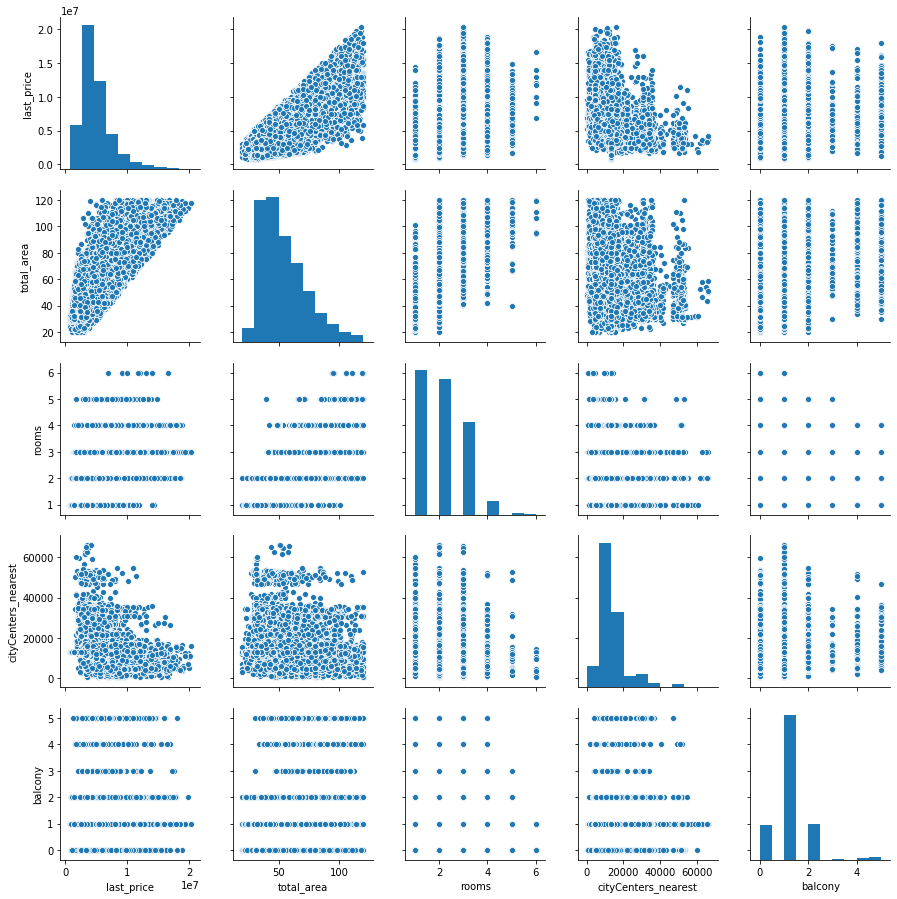

In [20]:
sns.pairplot(correct_list_of_apart)

Теперь те же операции проделаем для столбцов с ценой и датой. 

In [21]:
correct_data_time = list_of_apart[['last_price', 'year', 'month', 'weekday']]
correct_data_time.corr()

,last_price,year,month,weekday
last_price,1.000000,-0.043089,0.002779,0.001550
year,-0.043089,1.000000,-0.269642,-0.004799
month,0.002779,-0.269642,1.000000,0.011496
weekday,0.001550,-0.004799,0.011496,1.000000


В таблице корелляции наблюдаем крайне маленькие значения. Можно сказать что время размещения очень слабо влияет на цену квартиры.

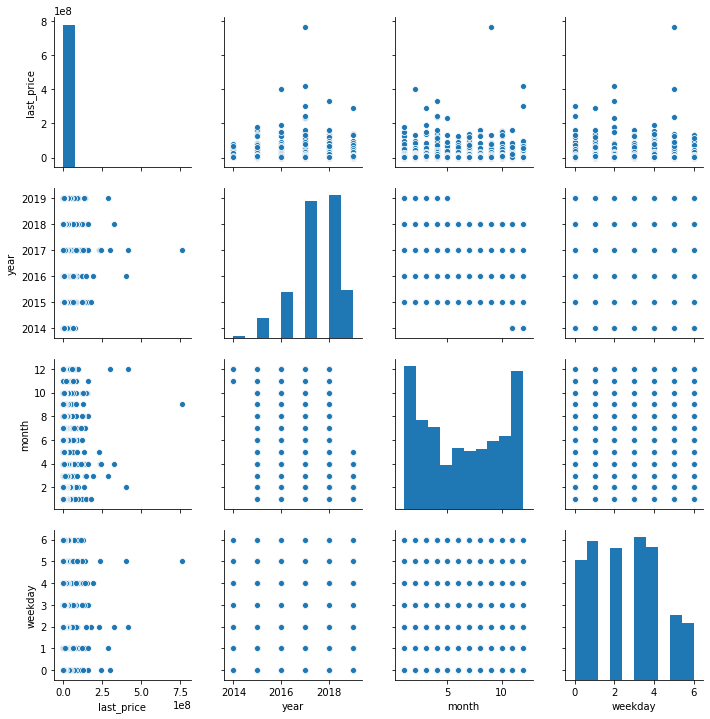

In [22]:
sns.pairplot(correct_data_time)

Проанализировав графики можем сказать что пик предложений приходится на 2017 и 2018г. По гистрограмме месяцов видно что пик предложений приходится на начало и конец года, и на первую половину недели.

Поглядим на количество предложений по месту расположения недвижимости. Спб в лидерах с очень большим отрывом.

In [23]:
fix_new_list_of_apart['locality_name'].value_counts().head(10)

санкт-петербург      13161
посёлок мурино         494
посёлок шушары         434
всеволожск             383
пушкин                 331
колпино                325
посёлок парголово      321
гатчина                296
деревня кудрово        283
выборг                 215
Name: locality_name, dtype: int64

In [24]:
print ((fix_new_list_of_apart
  .pivot_table(index='locality_name', values='price_per_meter', aggfunc='median')
  .sort_values('price_per_meter', ascending=False)
  .head(10))) 

                   price_per_meter
locality_name                     
посёлок лисий нос    121616.221359
санкт-петербург      102409.638554
кудрово              100000.000000
зеленогорск          100000.000000
сестрорецк            99678.456592
пушкин                99431.818182
посёлок левашово      96997.690531
посёлок парголово     92051.282051
деревня кудрово       91666.666667
деревня мистолово     90888.888889


Сформировали сводную таблицу по локации и цене за 1м2. Применили медиану к цене за 1м2. По цене за 1м2 Спб не является лидером. Первое место занимает поселок Лисий нос. Мистолово - самое дешевое место.

Теперь попробуем выделить центральную часть СПБ и поглядеть на динамику цен в зависимости от расстояния отцентра города.
Округлим расстояния от центра. Отфильтруем и запишем строки с локацией СПБ в новую переменную. С помощью графика посмотрим на каком расстоянии от города чаще всего продают квартиры. Максимальное число предложений видим на расстоянии 12 км от центра.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


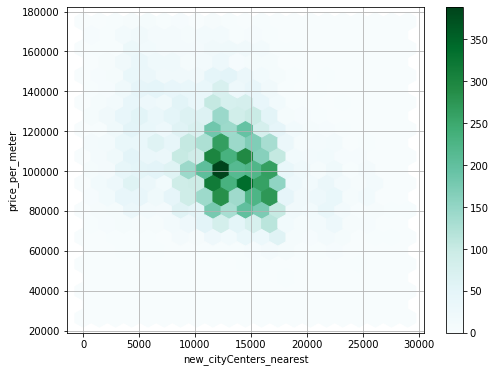

In [25]:
fix_new_list_of_apart['new_cityCenters_nearest'] = fix_new_list_of_apart['cityCenters_nearest'].round(-3)
spb_list_of_apart = fix_new_list_of_apart.query('locality_name == "санкт-петербург"')[['last_price', 'total_area', 'price_per_meter', 'rooms', 'floor_group', 'new_cityCenters_nearest', 'balcony', 'locality_name']]

spb_list_of_apart.plot(x='new_cityCenters_nearest', y='price_per_meter', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)


In [26]:
(spb_list_of_apart
  .pivot_table(index='new_cityCenters_nearest', values='price_per_meter')
  .sort_values('price_per_meter', ascending=False))

,price_per_meter
new_cityCenters_nearest,
6000.0,122961.049196
5000.0,122338.108109
1000.0,118765.831309
7000.0,118604.607089
4000.0,116710.393006
8000.0,115936.078843
0.0,114373.749500
2000.0,112380.210875
3000.0,110984.763354


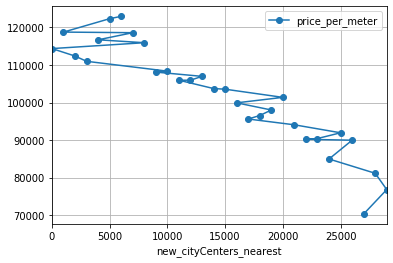

In [27]:
(spb_list_of_apart
  .pivot_table(index='new_cityCenters_nearest', values='price_per_meter')
  .sort_values('price_per_meter', ascending=False)
  .plot(style='o-', grid=True))

По данному графику и по свобной таблице видно что цена сильно скачет и местами не сильно зависит от расстояния от центра города. Например встречаются строки 1000.0	- 118765.831309 и 6000.0 - 122961.049196 (удаленность от центра - цена за 1м2).
По каким-то причинам цена в 1км от центра меньше цены в 6км от центра. я этого не ожидал, но этому есть объяснение. Вполне возможно что продавцы по каким-то причинам занижали цены ближе к центру, возможно что есть какие то другие причины влияющие на цену.

Напишем функцию с помощью которой объединим расстояния от центра в группы. Посмотрим что из этого получится.

In [28]:
def km(new_cityCenters_nearest):  
    if 0 <= new_cityCenters_nearest <= 5000:
        return 5000
    if 5000 < new_cityCenters_nearest <= 10000:
        return 10000
    if 10000 < new_cityCenters_nearest <= 15000:
        return 15000
    if 15000 < new_cityCenters_nearest <= 20000:
        return 20000
    if 20000 < new_cityCenters_nearest <= 25000:
        return 25000
    else:
        return 30000

Теперь имеем группы 5000м, 10000м, 15000м, 20000м, 25000м и 30000м.

In [29]:
spb_list_of_apart['group_km'] = spb_list_of_apart['new_cityCenters_nearest'].apply(km)
(spb_list_of_apart
  .pivot_table(index='group_km', values='price_per_meter')
  .sort_values('price_per_meter', ascending=False))

,price_per_meter
group_km,
5000,117849.619356
10000,113347.474696
15000,105227.610212
20000,98057.749950
25000,91023.272133
30000,87877.044916


Построим график по данным групп и цене за 1м2.

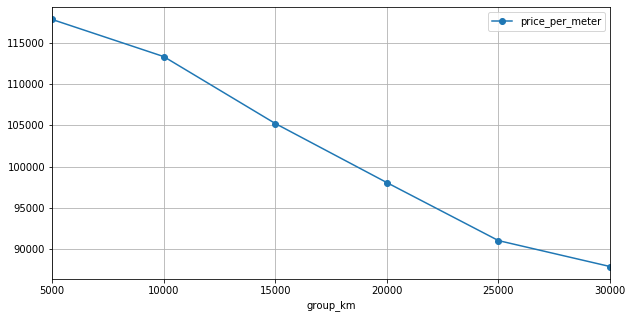

In [30]:
(spb_list_of_apart
  .pivot_table(index='group_km', values='price_per_meter')
  .sort_values('price_per_meter', ascending=False)
  .plot(style='o-', grid=True, figsize=(10, 5)))

По графику выше, видим снижение цены за 1м2 на расстоянии 10 км от центра и 25 км. Причем если в промежутке 10-25 км мы видим уменьшение цены при увеличении расстояния, то в промежутке 25к и более расклад немного меняется, цена уже не падает так сильно. Это самые сильные изменения цен по городу. Далее проанализируем и сравним коэфф. для центра города (0-10км) и для всего города.

In [31]:
center_spb = spb_list_of_apart.query('0 < new_cityCenters_nearest <= 10000')[['last_price', 'total_area', 'rooms', 'floor_group', 'new_cityCenters_nearest', 'balcony']]
center_spb.corr() # для центра 

,last_price,total_area,rooms,new_cityCenters_nearest,balcony
last_price,1.000000,0.835932,0.547212,-0.324038,0.149625
total_area,0.835932,1.000000,0.795926,-0.334976,0.039563
rooms,0.547212,0.795926,1.000000,-0.261192,-0.057102
new_cityCenters_nearest,-0.324038,-0.334976,-0.261192,1.000000,0.132063
balcony,0.149625,0.039563,-0.057102,0.132063,1.000000


In [32]:
correct_list_of_apart.corr() # для города

,last_price,total_area,rooms,cityCenters_nearest,balcony
last_price,1.000000,0.760584,0.467048,-0.213013,0.117160
total_area,0.760584,1.000000,0.793346,-0.107096,0.105079
rooms,0.467048,0.793346,1.000000,-0.062983,0.045908
cityCenters_nearest,-0.213013,-0.107096,-0.062983,1.000000,0.016370
balcony,0.117160,0.105079,0.045908,0.016370,1.000000


Видим что зависимость цены от площади, количества комнат и балкона сильнее у центральной части города, чем у всего города, однако разница в коэффициентах не столь велика.

### Шаг 5. Общий вывод

Рынок недвижимости ленинградской области представлен в большенстве своем недвижимостью в границах Санкт_Петербурга.

санкт-петербург    13161
посёлок мурино       494
посёлок шушары       434
всеволожск           383
пушкин               331
Name: locality_name, dtype: int64


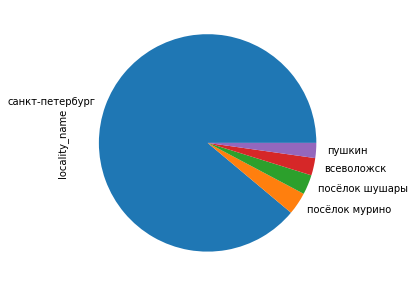

In [33]:
print(fix_new_list_of_apart['locality_name'].value_counts().head()) 
locality_name = fix_new_list_of_apart['locality_name'].value_counts().head()
locality_name.columns = ['name', 'count']
locality_name.plot(kind='pie', y='count', figsize=(5, 5))

По гистограммам времени можно увидеть изменение продаваемой недвижимости в зависимости от года, дня недели и месяца. Например резкий скачок предложений в 2017-2018 году. А так же скачки предложений в начале года и конце. А также стабильно большие показатели предлодений в первой половине недели.

In [34]:
correct_data_time = list_of_apart[['last_price', 'year', 'month', 'weekday']]
correct_data_time.corr()

,last_price,year,month,weekday
last_price,1.000000,-0.043089,0.002779,0.001550
year,-0.043089,1.000000,-0.269642,-0.004799
month,0.002779,-0.269642,1.000000,0.011496
weekday,0.001550,-0.004799,0.011496,1.000000


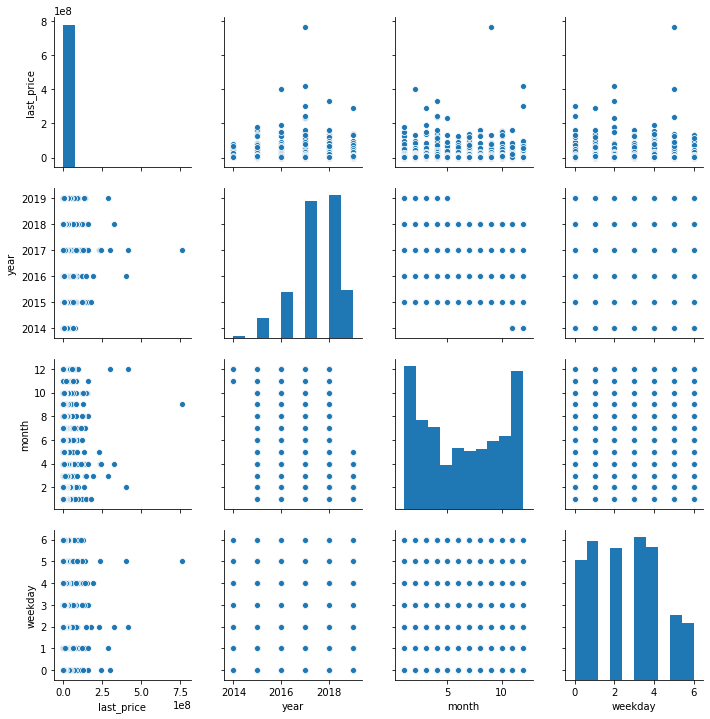

In [35]:
sns.pairplot(correct_data_time)

По изученным данным можно сделать вывод, что в числе продающихся квартир можно найти как квартиры на первом, так и квартиры на последнем этаже. Их число примерно равно, однако последний этаж встречается чуть чаще. Этажей кроме первого и последнего сильно больше.

другой       15256
последний     2725
первый        2549
Name: floor_group, dtype: int64


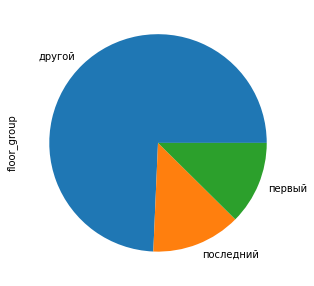

In [36]:
print (fix_new_list_of_apart['floor_group'].value_counts()) 
floor_count = fix_new_list_of_apart['floor_group'].value_counts()
floor_count.columns = ['name', 'count']
floor_count.plot(kind='pie', y='count', figsize=(5, 5))

Если изучить центр города, то порядок этажности примерно такой же.

другой       10316
последний     1464
первый        1381
Name: floor_group, dtype: int64


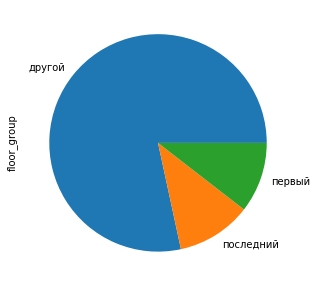

In [37]:
print (spb_list_of_apart['floor_group'].value_counts()) 
floor_count2 = spb_list_of_apart['floor_group'].value_counts()
floor_count2.columns = ['name', 'count']
floor_count2.plot(kind='pie', y='count', figsize=(5, 5))

Я бы разделил город условно на 3 ярковыраженные зоны по зависимости цена - расстояние от центра. Зона 0-10 км, 10-25 км, 25 и более км. В конце каждой из зона видны скачки цен за 1м2. Причем если в зоне 10-25 км ыена падает, то после 25 км цена не падает так сильно. Думаю такая динамика связана с тем, что после 25 км недвижимость представляет собой частную застройку или же многоквартирные дома, но с другим благоустройством и другой инфраструктурой.

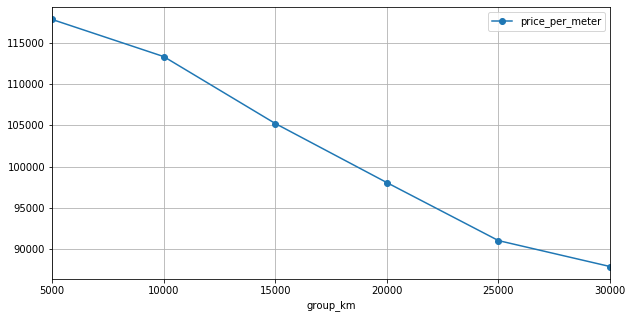

In [38]:
(spb_list_of_apart
  .pivot_table(index='group_km', values='price_per_meter')
  .sort_values('price_per_meter', ascending=False)
  .plot(style='o-', grid=True, figsize=(10, 5)))

Максимальное число предложений видим на расстоянии 12 км. от центра.

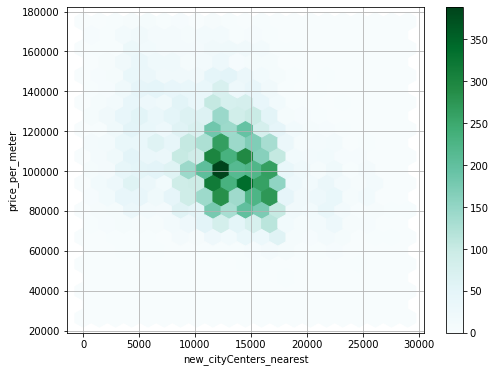

In [39]:
spb_list_of_apart.plot(x='new_cityCenters_nearest', y='price_per_meter', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

In [40]:
center_spb.corr() # для центра 

,last_price,total_area,rooms,new_cityCenters_nearest,balcony
last_price,1.000000,0.835932,0.547212,-0.324038,0.149625
total_area,0.835932,1.000000,0.795926,-0.334976,0.039563
rooms,0.547212,0.795926,1.000000,-0.261192,-0.057102
new_cityCenters_nearest,-0.324038,-0.334976,-0.261192,1.000000,0.132063
balcony,0.149625,0.039563,-0.057102,0.132063,1.000000


Показатели для центра говорят нам о том, что чем сильнее мы отдаляемся от центра, тем дешевле становится недвижимость и больше площадь.

In [41]:
correct_list_of_apart.corr() # для города

,last_price,total_area,rooms,cityCenters_nearest,balcony
last_price,1.000000,0.760584,0.467048,-0.213013,0.117160
total_area,0.760584,1.000000,0.793346,-0.107096,0.105079
rooms,0.467048,0.793346,1.000000,-0.062983,0.045908
cityCenters_nearest,-0.213013,-0.107096,-0.062983,1.000000,0.016370
balcony,0.117160,0.105079,0.045908,0.016370,1.000000


Показатели для центра говорят нам о том же что и показатели для центра, однако есть разница в показателях. Изменение цены при удалении более ощутимо нежели изменение площади.

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод